Original: 


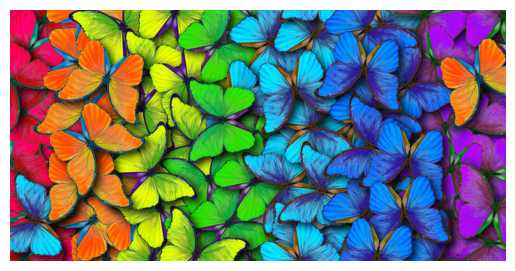

k=8: 


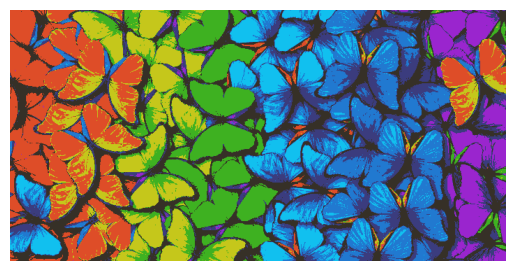

After extended palette approximation (original + pairwise blends):


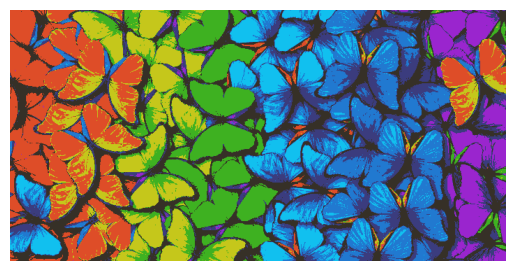

In [ ]:
import cv2
import numpy as np
import numpy.random as ra
import matplotlib.pyplot as plt

# function to check convergence
def com(l, l1):
    for i in range(len(l1)):
        for j in range(3):
            if abs(int(l[i][j]) - int(l1[i][j])) > 2.0:
                return False
    return True

# read input
fname = "file.jpg"
img = cv2.imread(fname)
a = 8   #k
l = []

# k-means: initialize clusters
for i in range(a):
    r = ra.randint(0, len(img))
    c = ra.randint(0, len(img[0]))
    l.append([int(img[r, c, 0]), int(img[r, c, 1]), int(img[r, c, 2])])

# iterate until convergence
while True:
    l1 = []
    cluster = [[] for _ in range(a)]

    for row in range(len(img)):
        for col in range(len(img[row])):
            m = float('inf')
            ind = 0
            for j in range(a):
                c_dist = sum((int(img[row, col, k]) - int(l[j][k])) ** 2 for k in range(3))
                if c_dist <= m:
                    m = c_dist
                    ind = j
            cluster[ind].append([row, col])

    for i in range(a):
        s1 = s2 = s3 = 0.0
        for j in cluster[i]:
            s1 += img[j[0], j[1], 0]
            s2 += img[j[0], j[1], 1]
            s3 += img[j[0], j[1], 2]
        l1.append([s1 / len(cluster[i]), s2 / len(cluster[i]), s3 / len(cluster[i])])

    if com(l, l1):
        break
    else:
        l = l1

# show hard quantized image
print("Original: ")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
t_img=img

for i in range(a):
    for j in cluster[i]:
        for k in range(3):
            img[j[0], j[1], k] = int(l[i][k])

print("k=" + str(a) + ": ")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# new approximation using original centroids + all pairwise midpoints
print("After extended palette approximation (original + pairwise blends):")

extended_palette = [np.array(c, dtype=np.float32) for c in l]  # original centroids

#add all midpoints between centroid pairs
for i in range(len(l)):
    for j in range(i+1, len(l)):
        midpoint = (np.array(l[i]) + np.array(l[j])) / 2.0
        extended_palette.append(midpoint)

#mapping again to nearest neighbors
new_img = np.zeros_like(t_img)
h, w = t_img.shape[:2]

for y in range(h):
    for x in range(w):
        pixel = t_img[y, x].astype(np.float32)
        dists = [np.sum((pixel - color)**2) for color in extended_palette]
        best_color = extended_palette[np.argmin(dists)]
        new_img[y, x] = np.clip(best_color, 0, 255).astype(np.uint8)

plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()